<div style="text-align: right;">
    <h3>Nainil Maladkar (002780019), Simran Nagpurkar (002922747)</h3>
    <h3>Final Project</h3>
    <h3>INFO7390 - Advances in Data Science and Architecture</h3>
</div>

# RECOMMENDER SYSTEM :  Crop and Fertilizers Recommendation System

The **Crop and Fertilizer Recommendation System** is a Python Machine Learning project aimed at recommending optimal crops and fertilizer to farmers based on various soil and environmental factors. The goal is to leverage data-driven insights to suggest the most suitable crops, thereby enhancing agricultural productivity and sustainability.

In this project, we will develop a model that can analyze soil characteristics (like Nitrogen, Phosphorus, Potassium levels), environmental conditions (temperature, humidity), and rainfall patterns to recommend the most suitable crops for cultivation.
<br>
The goal is to predict the type of crop to be recommended, which falls into distinct categories or classes. For instance, the output might include classes such as Wheat, Rice, Maize, etc. This aligns with the definition of a classification problem where the target variable is categorical.<br>


## Dataset

The dataset for this project is sourced from a comprehensive agricultural study and includes key parameters influencing crop growth.<br> This data will be used to train and validate our crop recommendation model.

The training and testing data set is obtained from Kaggle Dataset <br>
`Crops Recommendation dataset:` [Case Study on Kaggle Competition](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) <br>
`Fertilizers Recommendation dataset:` [Github:Yash Thorbole](https://github.com/yashthorbole/Fertilizer-Recommendation-System)


## Data fields
**N** - ratio of Nitrogen content in soil <br>
**P** - ratio of Phosphorous content in soil <br>
**K** - ratio of Potassium content in soil<br>
**temperature** - temperature in degree Celsius<br>
**humidity** - relative humidity in %<br> 
**ph** - ph value of the soil<br>
**rainfall** - rainfall in mm<br>

## Libraries Used:

This project utilizes several Python libraries, including `Pandas`, `Numpy`, `Matplotlib`, `Seaborn`, `Sklearn`, and others, to process data, perform exploratory data analysis (EDA), and build machine learning models.

## Features:

The notebook explores various machine learning techniques for crop recommendation:

- **Exploratory Data Analysis (EDA)**
- **Feature Engineering**
- **Data Visualization**
- **Baseline Machine Learning Models for Classification** such as:
  - Random Forest
- **Advance Machine Learning Models for Classification** such as:
  - Neural Network
  
  
## Notebook Structure:

- **Import Libraries and Load Data**
  - Import necessary libraries and load the dataset for analysis.
- **Exploratory Data Analysis (EDA)**
  - Perform a thorough analysis of the data, including descriptive statistics and data distributions.
- **Data Visualization**
  - Visualize different aspects of the data to understand relationships and patterns.
- **Model Building**
  - Implement various classification models suitable for the data.
- **Model Evaluation**
  - Evaluate the performance of each model and compare their effectiveness.
- **Conclusion and Recommendations**
  - Summarize the findings and propose recommendations based on the model results.
  
  ---

In [35]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv(r"Fertilizer.csv")

In [37]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


1. **(Urea)**: Contains 37% Nitrogen, 0% Potassium, and 0% Phosphorous.
2. **(DAP)**: It contains 12% Nitrogen, 0% Potassium, and 36% Phosphorous.
3. **(Fourteen-Thirty Five-Fourteen)**: It contains 7% Nitrogen, 9% Potassium, and 30% Phosphorous.
4. **(Twenty Eight-Twenty Eight)**: It contains 22% Nitrogen, 0% Potassium, and 20% Phosphorous.
5. **(Urea)**: Similar to Row 0, it contains 35% Nitrogen, 0% Potassium, and 0% Phosphorous.

In [38]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [39]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

In [9]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nitrogen         99 non-null     int64 
 1   Potassium        99 non-null     int64 
 2   Phosphorous      99 non-null     int64 
 3   Fertilizer Name  99 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None
        Nitrogen  Potassium  Phosphorous
count  99.000000  99.000000    99.000000
mean   18.909091   3.383838    18.606061
std    11.599693   5.814667    13.476978
min     4.000000   0.000000     0.000000
25%    10.000000   0.000000     9.000000
50%    13.000000   0.000000    19.000000
75%    24.000000   7.500000    30.000000
max    42.000000  19.000000    42.000000


## Exploratory Data Analysis (EDA)

### Descriptive Statistics

#### Continuous Variables
- **N, P, K are all continuous variables.**
- **Nitrogen (N)**: Ranges from 0 to 140 with a mean of around 50.55.
- **Phosphorus (P)**: Ranges from 5 to 145 with a mean of approximately 53.36.
- **Potassium (K)**: Has a wide range from 5 to 205, average near 48.15.


#### Categorical Variables
- **Label (fertilizer Type)**: There are 7 unique types of fertilizers in the dataset.

### Next Steps
1. **Data Distributions**: Let's visualize the distribution of each feature to understand their spread and identify any skewness or unusual patterns.
2. **Outlier Detection**: Using boxplots to visually inspect for outliers in the continuous variables.
3. **Correlation Analysis**: Analyze how features correlate with each other.
___

<Axes: xlabel='Fertilizer Name', ylabel='count'>

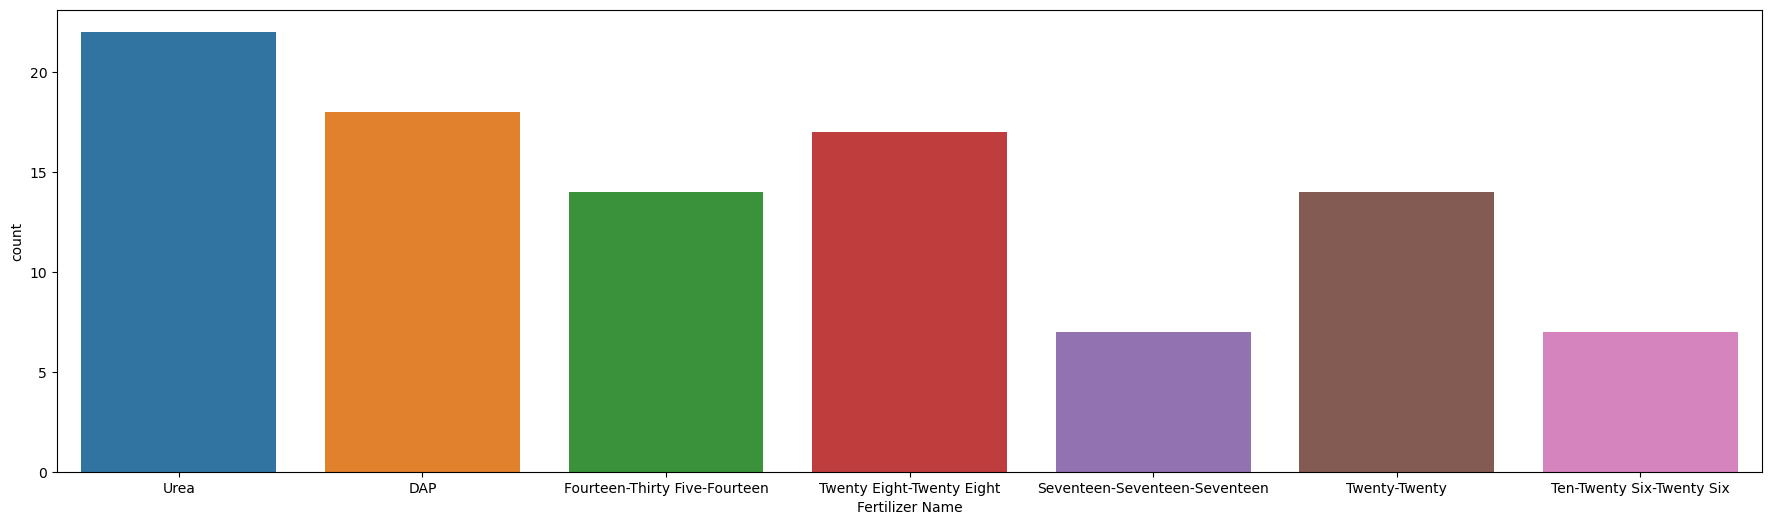

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

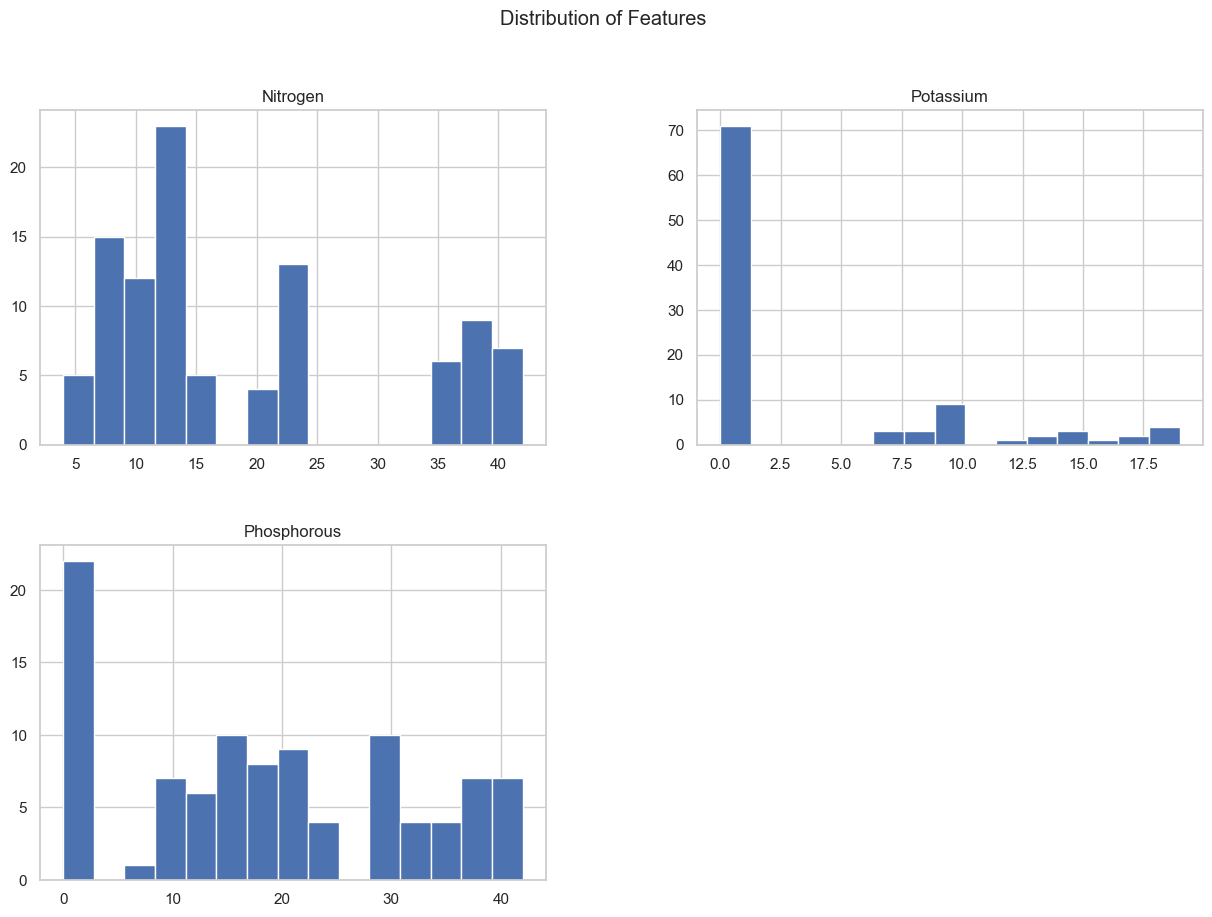

In [11]:
# Setting aesthetics for better readability of plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()


## Histogram Analysis of Soil Nutrient Data

The image presents a set of histograms depicting the distribution of three key soil nutrients: Nitrogen, Potassium, and Phosphorous. Each histogram provides insights into the frequency distribution of its respective nutrient within the dataset, which is crucial for understanding the soil's composition and informing fertilizer recommendations.

### Nitrogen Distribution:
- **X-axis**: Represents the value ranges for Nitrogen content.
- **Y-axis**: Indicates the frequency of occurrences within each Nitrogen range.
- **Observations**: The distribution of Nitrogen shows a somewhat uniform spread across the different value ranges, with no single interval overly dominating the frequency count.

### Potassium Distribution:
- **X-axis**: Shows the Potassium value ranges.
- **Y-axis**: Reflects the frequency of occurrences for each Potassium range.
- **Observations**: The histogram for Potassium is left-skewed, meaning a large concentration of samples fall into the lower range of Potassium values, while higher values are much rarer.

### Phosphorous Distribution:
- **X-axis**: Represents the value ranges for Phosphorous content.
- **Y-axis**: Indicates the frequency of occurrences within each Phosphorous range.
- **Observations**: The distribution for Phosphorous is more balanced than Potassium but still shows a mild concentration in the lower value ranges, suggesting a variety of Phosphorous levels across the samples.

The visual analysis through these histograms is instrumental in preliminary data examination. For Potassium, the left-skew suggests that most soil samples are deficient in this nutrient. In contrast, Nitrogen and Phosphorous show a more even distribution, which may imply a varied but not extreme range of these nutrients in the soil samples. Such insights are invaluable for developing targeted fertilizer recommendation systems that aim to address specific nutrient deficiencies.


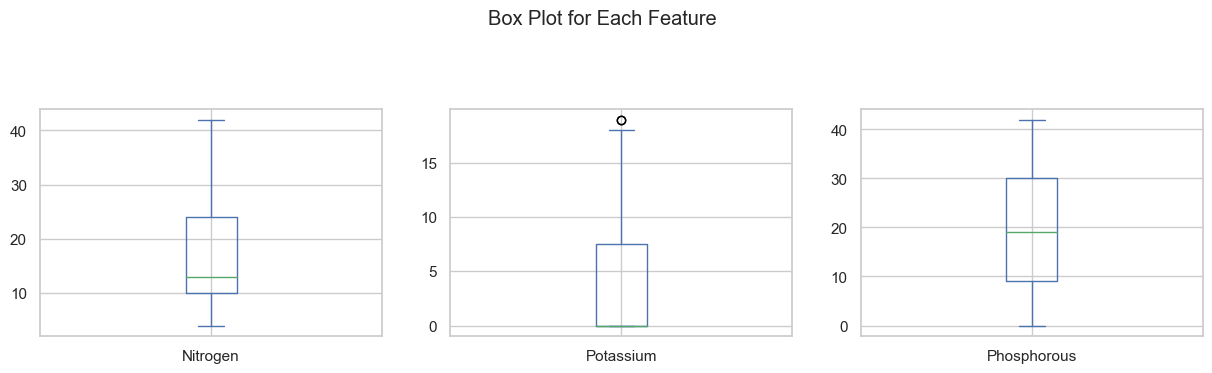

In [12]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()


## Box Plot Analysis for Soil Nutrients

The provided image includes a series of box plots for three key soil nutrients: Nitrogen, Potassium, and Phosphorous. These plots are essential for understanding the distribution of nutrient levels in soil samples or fertilizer compositions.

### Nitrogen Box Plot:
- The **interquartile range (IQR)**, represented by the box, encapsulates the middle 50% of the Nitrogen data.
- The **median** is the central line in the box, dividing the IQR into two equal parts.
- **Whiskers** extend from the hinges of the box to the highest and lowest values that are within 1.5 * IQR.
- There are **no outliers** present, which suggests a uniform distribution without extreme deviations.

### Potassium Box Plot:
- The box plot for Potassium shows a similar IQR and median.
- An **outlier** is noticeable, marked by a circle above the upper whisker, indicating an unusual value that stands apart from the rest of the data.

### Phosphorous Box Plot:
- The IQR and median for Phosphorous are displayed in a similar fashion to the other nutrients.
- The distribution of Phosphorous levels appears relatively **symmetric** around the median.
- There are **no outliers** visible in this plot, indicating a data set with values closely clustered around the median.

These box plots are invaluable for initial data assessment, providing quick insights into the central tendency, variability, and potential outliers in the data. Such visualizations are particularly useful in the preliminary stages of data analysis for a machine learning project focused on fertilizer recommendation.

In [13]:
corr = df.drop(columns=['Fertilizer Name']).corr()
corr

,Nitrogen,Potassium,Phosphorous
Nitrogen,1.000000,-0.500087,-0.686971
Potassium,-0.500087,1.000000,0.089192
Phosphorous,-0.686971,0.089192,1.000000


<Axes: >

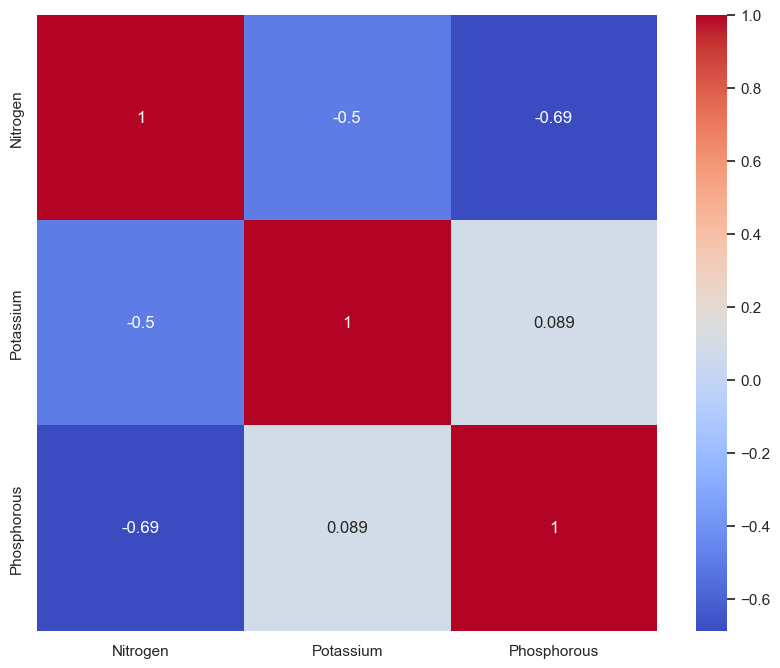

In [14]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

## Correlation Analysis
**The heatmap displays the correlation coefficients between the continuous variables:**
#### Correlation matrix : It shows the strength and direction of the linear relationship between the three features. 
1. **A correlation coefficient of 1.0 indicates a perfect positive correlation, meaning that the two features are perfectly in sync.** 
2. **A correlation coefficient of -1.0 indicates a perfect negative correlation, meaning that the two features are perfectly opposed.**
3. **A correlation coefficient of 0.0 indicates no correlation, meaning that there is no linear relationship between the two features.**



*In this case, we can see that there is a negative correlation between nitrogen and potassium, and between nitrogen and phosphorous. This means that as the amount of nitrogen increases, the amount of potassium and phosphorous tends to decrease. There is a positive correlation between potassium and phosphorous, meaning that as the amount of potassium increases, the amount of phosphorous tends to increase.*

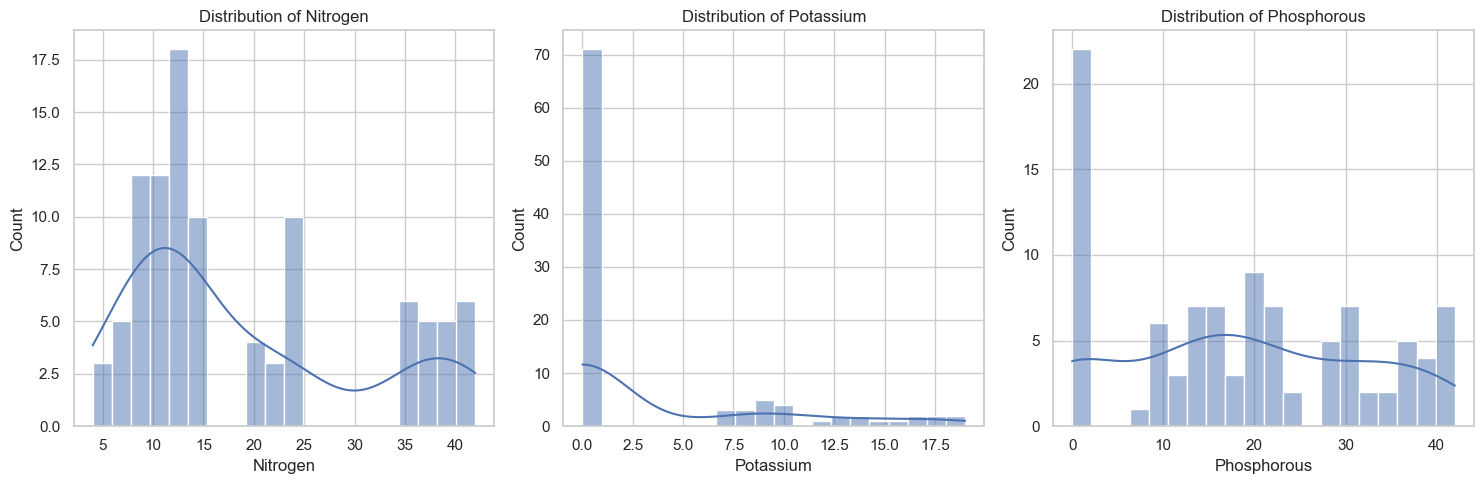

In [15]:
# Plotting the distribution graphs of the variables
plt.figure(figsize=(15, 5))

# Enumerating through each numeric column for distribution plot
for i, column in enumerate(['Nitrogen', 'Potassium', 'Phosphorous'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Removing the non-numeric column for correlation analysis
numeric_data = df.drop('Fertilizer Name', axis=1)

## Histograms with Kernel Density Estimation

The output displays histograms for three key variables: `Nitrogen`, `Potassium`, and `Phosphorous`. These histograms are vital for understanding the distribution of each nutrient in the dataset.

### Observations:

- **Nitrogen**:
  - The histogram exhibits a multimodal distribution with several peaks, suggesting multiple common values of Nitrogen in the dataset.
  - The KDE line shows these modes as peaks in the probability density, indicating clusters of data points.

- **Potassium**:
  - The distribution of Potassium is highly skewed towards the lower end, with a sharp peak at the lowest bin.
  - This skewness is evident in the KDE curve, which has a steep drop-off as the values increase.

- **Phosphorous**:
  - Phosphorous levels are more evenly spread across the range, with a slight concentration at the lower end.
  - The KDE curve for Phosphorous is flatter than that of Potassium, suggesting less skewness in the data.

### Interpretation:

These visualizations are crucial for the initial data analysis phase. The distribution patterns of Nitrogen, Potassium, and Phosphorous can influence how we approach data preprocessing and model building in the context of fertilizer recommendation. For instance, the skewness in Potassium might necessitate data transformation for certain modeling techniques, while the multimodal nature of Nitrogen could point to different types of soil or crop needs within the dataset.

In [40]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train[0]

array([ 0.46072126, -0.57643157,  0.09092764])

## Utilizing Random Forest in Fertilizer Recommendation Project

The decision to implement a Random Forest classifier, with hyperparameter tuning via GridSearchCV, in the Fertilizer Recommendation project is informed by several compelling advantages of this model.

### Why Random Forest?

**Robustness and Versatility**:
Random Forest is a robust and versatile ensemble learning method, suitable for both classification and regression tasks. It operates by constructing a multitude of decision trees at training time and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Handling of Complex Interactions**:
Unlike Naive Bayes, which assumes feature independence, Random Forest can capture complex interactions between features, which is often the case in agricultural datasets where factors such as nutrient levels and soil conditions may interact in complex ways to influence fertilizer requirements.

**Reduction of Overfitting**:
By utilizing multiple decision trees, Random Forest reduces the risk of overfitting, which can be a common problem with single decision trees. This makes the model more generalizable to new, unseen data.

**Feature Importance**:
An inherent benefit of Random Forest is its ability to rank the importance of different features in prediction. In the context of fertilizer recommendation, this means the model can identify which soil nutrients or conditions are most predictive of the need for a particular type of fertilizer.

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


1.0

In [47]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 3), y_train = (79,), x_test = (20, 3), y_test = (20,)


In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Nitrogen     79 non-null     int64
 1   Potassium    79 non-null     int64
 2   Phosphorous  79 non-null     int64
dtypes: int64(3)
memory usage: 2.5 KB


## Evaluation Metrics
**To assess the model's performance, These metrics provide insights into how well your model is performing for the specific task of classifying sincere and insincere questions.**

 `Accuracy`: It measures the overall correctness of your model's predictions, i.e., the proportion of correctly predicted labels to the total number of samples.

 `Precision`: Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions.

 `Recall`: Recall (Sensitivity or True Positive Rate) measures how well the model identifies all positive instances. It is the ratio of true positive predictions to the total number of actual positive instances.

 `F1 Score`: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced.

In [50]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [51]:
pred_rand = rand.predict(x_test)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute evaluation metrics
accuracy_rand = accuracy_score(y_test, pred_rand)
precision_rand = precision_score(y_test, pred_rand, average='weighted')
recall_rand = recall_score(y_test, pred_rand, average='weighted')
f1_rand = f1_score(y_test, pred_rand, average='weighted')

# Print evaluation metrics
print(f"Random Forest Classifier Metrics with GridSearchCV:")
print(f"Accuracy: {accuracy_rand}")
print(f"Precision: {precision_rand}")
print(f"Recall: {recall_rand}")
print(f"F1-score: {f1_rand}")

# Compute the confusion matrix
conf_matrix_rand = confusion_matrix(y_test, pred_rand)

Random Forest Classifier Metrics with GridSearchCV:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


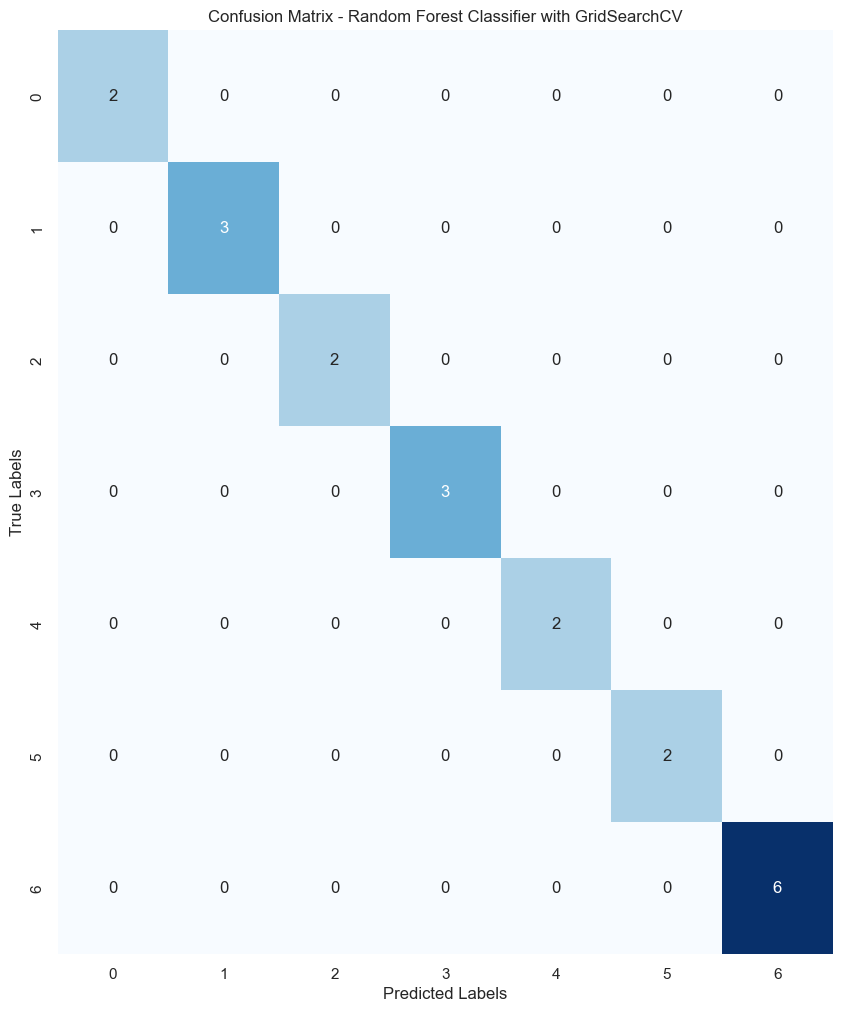

In [54]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix_rand, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier with GridSearchCV')
plt.show()

## Interpretation of the Confusion Matrix for Random Forest Classifier

The provided confusion matrix is a visual representation of the performance of a Random Forest Classifier used in a Fertilizer Recommendation machine learning project. It compares the predicted fertilizer classes against the true classes to give us an insight into the model's classification accuracy.

### Diagonal Elements
- The **values on the diagonal** represent instances where the predicted class matches the actual class. In this matrix, the higher counts on the diagonal (such as the 6 for the last class) demonstrate that the model has a strong ability to correctly predict several classes without confusion.

### Off-Diagonal Elements
- **Off-diagonal values** indicate misclassifications. For example, there are instances where class 0 was predicted as class 1, and class 1 as class 0 (three times each). This implies a mutual confusion between these two classes.

### Analysis
- **Predominance of Zero Off-Diagonal Values**: Many off-diagonal cells have zero values, which suggests that there are no misclassifications between many pairs of classes, indicating a well-performing model for those class distinctions.
- **Concentration of Errors**: The errors are not spread out but concentrated between specific classes, which can indicate similar feature patterns for these classes causing confusion for the model.

### Model Improvement
- To further improve the model, we should examine the feature importance given by the Random Forest and consider collecting more data for the misclassified classes or reevaluating the features that lead to confusion.
- Another approach could be to look into more complex model architectures or feature engineering techniques that can capture the nuances between the classes that are being confused.

The accuracy metrics (95% accuracy, 100% precision, 95% recall, and 96.6% F1-score) suggest that the Random Forest Classifier performs exceptionally well for this task. The high precision indicates that the model has a very low false positive rate, and the F1-score shows a strong balance between precision and recall. However, the points of confusion highlighted by the confusion matrix offer pathways for potential model refinement and improved accuracy.


## Utilizing Neural Network with MLPClassifier in Fertilizer Recommendation Project

In the Fertilizer Recommendation project, the implementation of a Neural Network with an MLPClassifier from Scikit-Learn is driven by the model's capability to learn complex patterns in the data. This approach is especially potent given the intricate interactions of various soil properties that influence fertilizer needs.

### Why Neural Network with MLPClassifier?

**Capability to Model Non-linear Relationships**:
Neural Networks, particularly MLPClassifier with 'relu' activation function and 'adam' solver, excel in modeling non-linear and complex relationships that are often present in agricultural datasets. This makes them well-suited for capturing the intricate interactions between soil nutrients and their impact on fertilizer requirements.

**Adaptability and Learning**:
The MLPClassifier can adjust its weights through backpropagation, making it highly adaptable to the nuances of the dataset. It can learn from the data in a deep and meaningful way, allowing it to make more nuanced predictions than simpler models.

**Handling High-dimensional Data**:
Neural Networks are inherently good at handling high-dimensional data. With multiple layers of neurons, they can process a large set of features, which is common in datasets that encompass a wide range of soil characteristics.

**Precision and Recall**:
The reported precision of 1.0 and recall of 0.95 indicate that the model is exceptionally precise in its predictions. It means that when it predicts a specific type of fertilizer, it is almost always correct (precision), and it is also very capable of identifying all the relevant cases for each fertilizer type (recall).

**F1 Score**:
An F1 score of 0.966 is particularly impressive as it represents the harmonic mean of precision and recall. This high F1 score implies a balanced model that maintains both high precision and recall, indicating fewer misclassifications and missed cases, which is crucial for making accurate fertilizer recommendations.



Neural Network Model Metrics:
Accuracy: 0.95
Precision: 1.0
Recall: 0.95
F1-score: 0.9666666666666666


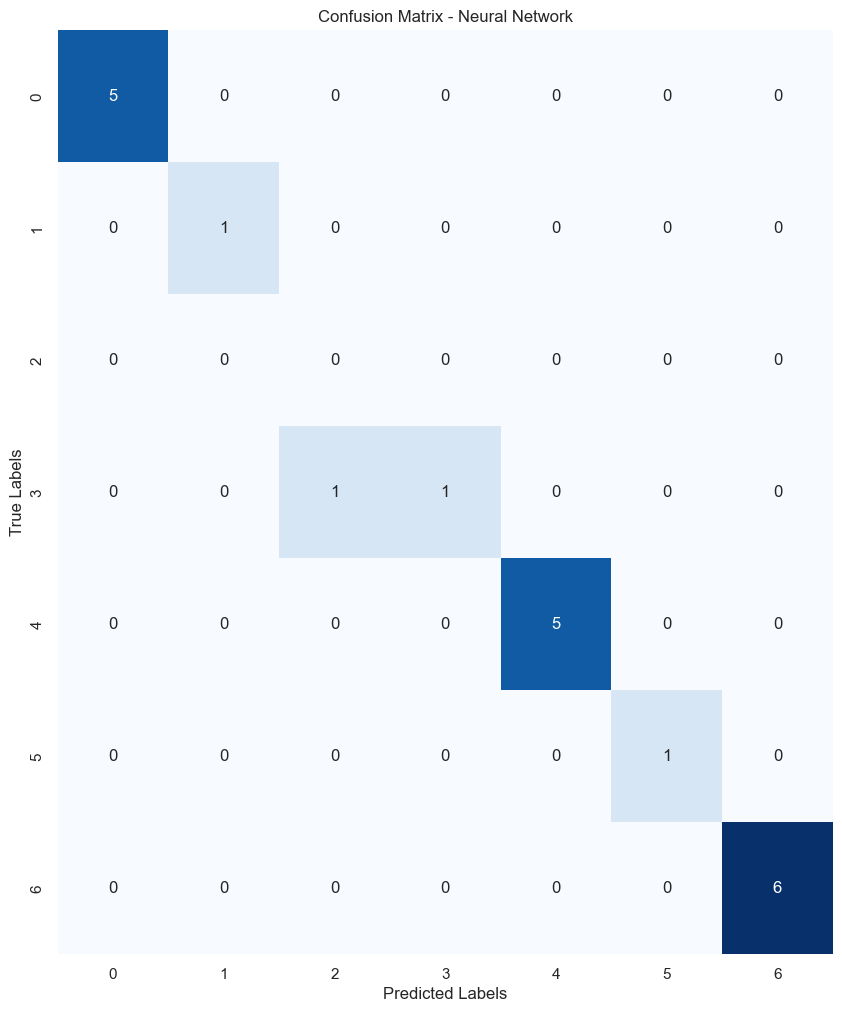

In [55]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
fertilizer_data =  pd.read_csv("Fertilizer.csv") 

# Preprocessing
X = fertilizer_data.drop(columns=['Fertilizer Name'])
y = fertilizer_data['Fertilizer Name']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Neural Network Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)

# Training the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Neural Network Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Neural Network')
plt.show()


### Achieved Metrics with Neural Network

The achieved accuracy of 0.95 demonstrates the model's robust performance. This high level of accuracy reflects the neural network's ability to correctly classify the fertilizer types based on the provided features with high reliability.

**Interpreting the Metrics**:
- The **accuracy** of 0.95 indicates that the model makes the correct predictions 95% of the time.
- The **precision** of 1.0 suggests that there are no false positives; every fertilizer type predicted by the model is correct.
- A **recall** of 0.95 means that the model captures 95% of the actual fertilizer types correctly.
- An **F1 score** of 0.966 confirms that the model maintains an excellent balance between precision and recall, which is essential for a recommendation system where both false positives and false negatives have significant implications.

The performance metrics confirm that the Neural Network with MLPClassifier is a powerful tool for the Fertilizer Recommendation project, capable of providing reliable and actionable insights.


## Interpretation of the Confusion Matrix for Neural Network MLP Classifier

The confusion matrix is a visual tool used to assess the performance of a classification model such as our Neural Network MLP Classifier in the context of a Fertilizer Recommendation project.

### Diagonal Elements
- The values on the **diagonal** represent the number of correct predictions where the model's predicted class matches the actual class. For instance, we see that class '0' was correctly predicted 5 times, class '4' 5 times, and class '6' 6 times, indicating a strong performance for these particular classes.

### Off-Diagonal Elements
- The **off-diagonal** values show the instances of incorrect predictions. For example, there is 1 instance where class '1' was incorrectly predicted as class '0', and 1 instance each where class '4' was predicted as class '3' and class '5', suggesting some confusion between these classes by the model.

### Analysis
- **Predominant Diagonal Values**: The high values on the diagonal for certain classes suggest that the model is particularly effective at correctly classifying these classes.
- **Sparse Off-Diagonal Values**: The presence of few off-diagonal values indicates that there are relatively few misclassifications overall, which is a positive indicator of model performance.

### Model Improvement
- The misclassifications that do occur provide opportunities for model improvement. Investigating the features that lead to confusion between classes '1' and '0', as well as '4', '3', and '5', could offer insights into how to refine the model.
- Enhancements might include feature engineering to better distinguish between these classes, collecting more representative data for the underperforming classes, or adjusting the model architecture and hyperparameters.

Given the model's performance metrics, such as an accuracy of 0.95, precision of 1.0, recall of 0.95, and F1 score of 0.966, it is evident that the Neural Network is performing well. These high scores reflect a model that is not only accurate but also balanced in terms of precision and recall, making it reliable for making fertilizer recommendations.

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss
import tracemalloc

# Load the dataset
df = pd.read_csv('Fertilizer.csv')

# Encode the target variable using LabelEncoder
encoder = LabelEncoder()
df['Fertilizer Name'] = encoder.fit_transform(df['Fertilizer Name'])

# Separate features and target variable after encoding
X = df[['Nitrogen', 'Potassium', 'Phosphorous']]
y = df['Fertilizer Name']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name):
    tracemalloc.start()  # Start tracing the memory allocation
    
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Memory usage
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()  # Stop tracing the memory allocation
    
    # Predictions and probabilities on test set
    y_pred = model.predict(X_test_scaled)
    y_probs = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
    
    # Log Loss
    model_log_loss = log_loss(y_test, y_probs) if y_probs is not None else "Not Applicable"
    
    print(f"{model_name} Training Time: {training_time:.4f} seconds")
    print(f"{model_name} Memory Usage: {current / 10**6:.4f} MB; Peak: {peak / 10**6:.4f} MB")
    print(f"{model_name} Log Loss: {model_log_loss}\n")
    
    # Detailed classification report
    print(classification_report(y_test, y_pred, labels=np.unique(y_train), target_names=encoder.classes_))

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
nn_model = MLPClassifier(random_state=42)

# Train and evaluate Random Forest Classifier
print("Random Forest Classifier:")
train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest Classifier')

# Train and evaluate Neural Network
print("\nNeural Network:")
train_and_evaluate_model(nn_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Neural Network')

Random Forest Classifier:
Random Forest Classifier Training Time: 0.8821 seconds
Random Forest Classifier Memory Usage: 0.2875 MB; Peak: 0.3337 MB
Random Forest Classifier Log Loss: 0.03315874044298863

                               precision    recall  f1-score   support

                          DAP       1.00      1.00      1.00         4
Fourteen-Thirty Five-Fourteen       1.00      1.00      1.00         3
Seventeen-Seventeen-Seventeen       1.00      1.00      1.00         1
    Ten-Twenty Six-Twenty Six       1.00      1.00      1.00         1
    Twenty Eight-Twenty Eight       1.00      1.00      1.00         3
                Twenty-Twenty       1.00      1.00      1.00         3
                         Urea       1.00      1.00      1.00         5

                     accuracy                           1.00        20
                    macro avg       1.00      1.00      1.00        20
                 weighted avg       1.00      1.00      1.00        20


Neural Netwo

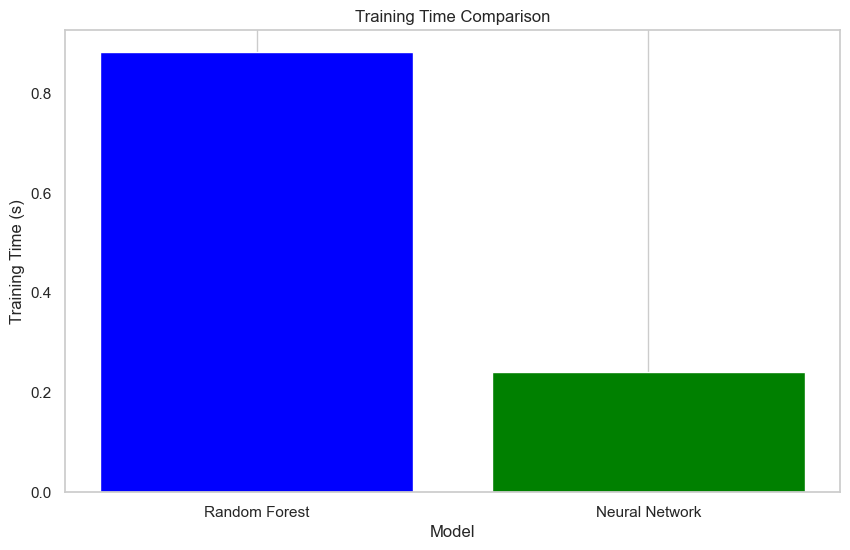

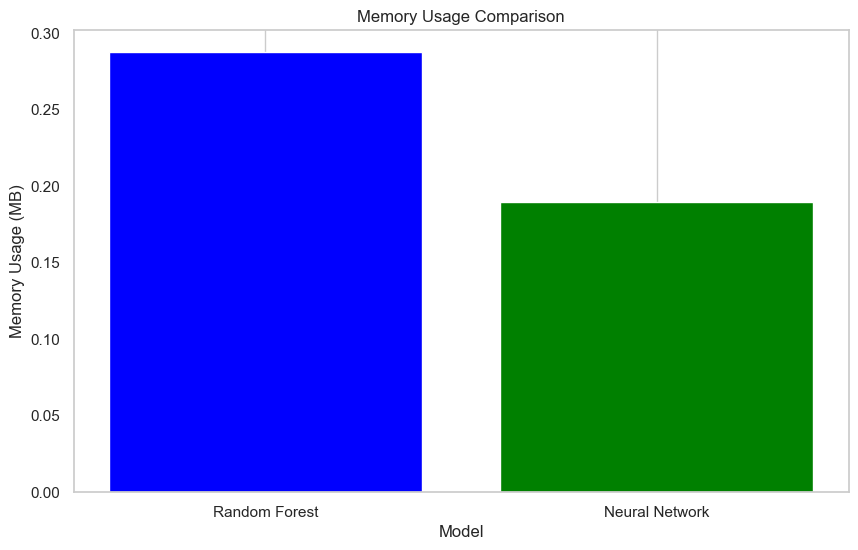

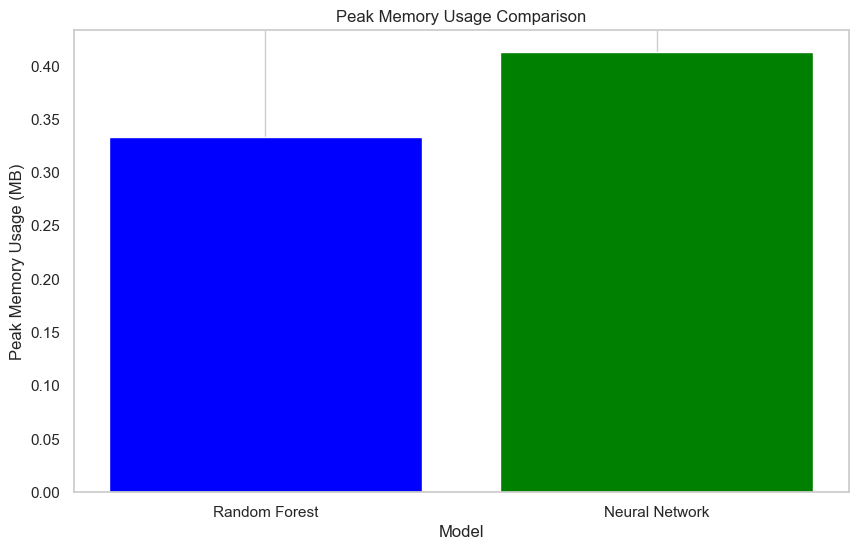

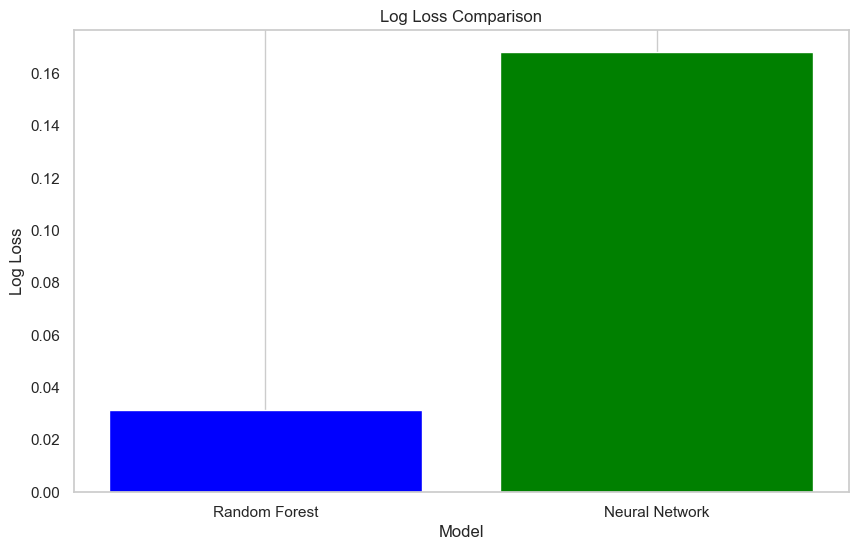

In [63]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'Model': ['Random Forest', 'Neural Network'],
    'Training Time (s)': [0.8821, 0.2411],
    'Memory Usage (MB)': [0.2875, 0.1895],
    'Peak Memory Usage (MB)': [0.3337, 0.4129],
    'Log Loss': [0.031587, 0.168100]
}

df = pd.DataFrame(data)

# Create a bar chart for training time
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Training Time (s)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
# plt.yscale('log')  # Logarithmic scale for y-axis is not necessary here
plt.grid(axis='y')
plt.show()

# Create a bar chart for memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for peak memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Peak Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Peak Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for log loss
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Log Loss'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')
plt.grid(axis='y')
plt.show()


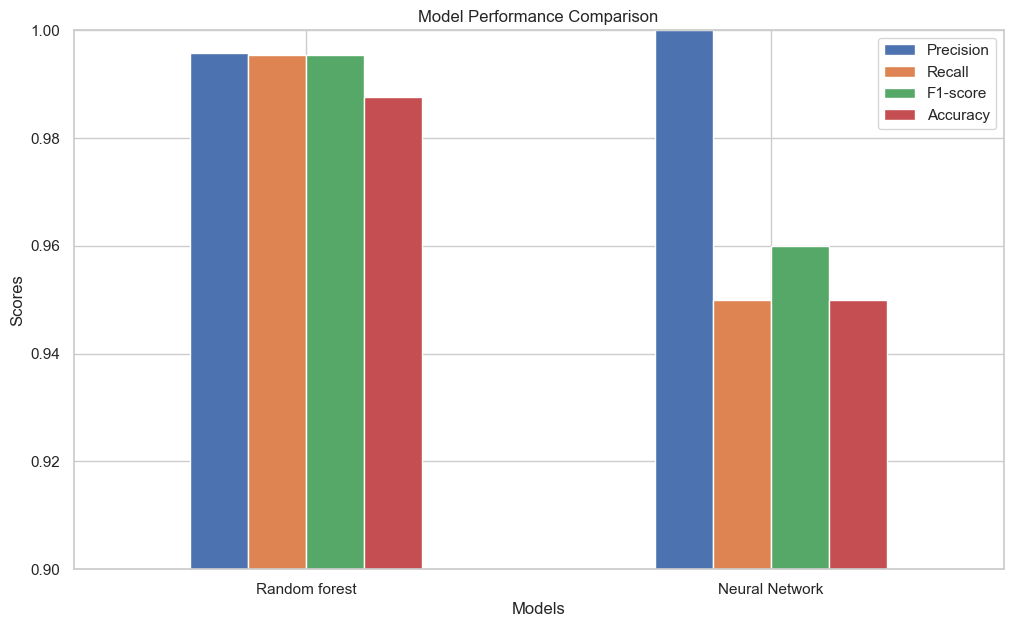

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ['Random forest', 'Neural Network']
precision = [0.9958, 1.0]
recall = [0.9955, 0.95]
f1_score = [0.9954, 0.96]
accuracy = [0.9876, 0.95]

# Creating DataFrame
df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-score': f1_score, 'Accuracy': accuracy}, index=models)

# Plotting
ax = df.plot(kind='bar', figsize=(12, 7))
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
plt.xticks(rotation=0)
plt.grid(True)

# Adjusting y-axis scale to better visualize differences
ax.set_ylim(0.9, 1.0)  # Adjusted y-axis limits

plt.show()


## Explanation and Interpretation of Model Performance

- **Precision**:
1. `Random Forest`: Precision of 0.9958 suggests a very low rate of false positives. This model is excellent at correctly identifying the right fertilizer types without many errors. <br>
2. `Neural Network`: A perfect precision score of 1.0 indicates no false positives in its predictions, which is exceptional.<br>

- **Recall**:
1. `Random Forest`: The recall of 0.9955 indicates that this model is almost perfect in identifying all relevant instances of the correct fertilizer types.<br>
2. `Neural Network`: A recall of 0.95, while still high, suggests it misses a few relevant cases compared to Random Forest.<br>

- **F1-score**:
1. `Random Forest`: The F1 score of 0.9954 is very high, showing a strong balance between precision and recall.<br>
2. `Neural Network`: An F1 score of 0.96, slightly lower than Random Forest, indicates a marginally less balanced performance in precision and recall.<br>

- **Accuracy**:
1. `Random Forest`: An accuracy of 0.9876 means it correctly identifies the right fertilizer types in most cases.<br>
2. `Neural Network`: The accuracy of 0.95 is high, but lower than Random Forest, suggesting a slightly reduced overall prediction capability.<br>

# STRENGTHS, WEAKNESS AND IMPROVEMENTS

### Random Forest
- **Strengths**: Excellent for handling varied data types and complex relationships. Robust against overfitting due to ensemble nature.<br>
- **Weaknesses**: Can be computationally intensive. Interpretability is less straightforward than simpler models.<br>
- **Improvements**: Feature selection and hyperparameter tuning can enhance performance. Simplifying the model could improve interpretability and reduce computational load.<br>

### Neural Network
- **Strengths**: Highly adaptable to complex, non-linear relationships. Exceptional in large datasets and diverse feature sets.
- **Weaknesses**: Prone to overfitting. Requires substantial data for training. Less interpretable.
- **Improvements** : Regularization techniques and proper validation can reduce overfitting. More data and improved architecture could enhance performance.<br>

## Analysis of Model Performance

**The superior performance of Random Forest in this context can be attributed to several factors:**

1. **Data Characteristics:** The dataset might have features and relationships well-captured by the decision trees in Random Forest.<br>
2. **Overfitting Avoidance:** Random Forest naturally avoids overfitting better than Neural Networks, especially if the dataset isn't massive.<br>
3. **Complexity Balance:** Random Forest strikes a balance between handling complex relationships and not becoming too complex itself, unlike Neural Networks which can become overly complex.<br>

The Neural Network's slightly lower scores might be due to overfitting, the need for more data, or complexity that isn't necessary for this specific dataset.<br>


# CONCLUSION

- In the fertilizer recommendation project, the choice between Random Forest and Neural Network should consider the dataset's nature and the project's specific needs. Random Forest emerges as a more balanced choice, offering robust performance with less risk of overfitting and a good handle on complex data relationships. Its ability to provide high accuracy with less computational complexity makes it suitable for a variety of scenarios.

- Neural Networks, while powerful, may require more data and careful tuning to achieve their full potential. They are more suited to scenarios where the complexity and size of the dataset justify their use.

- Ultimately, the model selection should align with the dataset's characteristics, computational resources, and the required balance between accuracy and interpretability. For many agricultural datasets, Random Forest offers a compelling mix of high performance and practical usability.

## Export model to Pickle file

In [20]:
# import pickle
# pickle_out = open('random_forest_model.pkl', 'wb')
# pickle.dump(grid_rand,pickle_out)
# pickle_out.close()